#Importing necessary library packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import torch
import string
import tensorflow as tf
from textblob import TextBlob
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax
import nltk
from nltk.tokenize import sent_tokenize
from wordcloud import WordCloud
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout


#Loading the dataset

In [ ]:
print("Loading The Data:")
cw2_data = pd.read_csv('/content/WASSA23_essay_level_dev.tsv', delimiter='\t')
cw2_data.head()

Loading The Data:


,conversation_id,article_id,essay,speaker_id,gender,education,race,age,income,speaker_number,split,essay_id
0,1,35,How sad is it that this kind of pain and suffe...,68,2,2,1,21,20000,1,dev,0
1,4,35,The article is kind of tragic and hits close t...,79,1,6,3,33,64000,1,dev,3
2,7,213,"I think that these kinds of stories, are sad, ...",68,2,2,1,21,20000,1,dev,6
3,9,213,It's crazy that random accidents like this hap...,84,2,4,1,25,55000,1,dev,8
4,12,78,This story makes me so so sad.... As someone w...,68,2,2,1,21,20000,1,dev,11


#Display the data information

In [ ]:
print("Data Info:")
cw2_data.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   conversation_id  208 non-null    int64 
 1   article_id       208 non-null    int64 
 2   essay            208 non-null    object
 3   speaker_id       208 non-null    int64 
 4   gender           208 non-null    int64 
 5   education        208 non-null    int64 
 6   race             208 non-null    int64 
 7   age              208 non-null    int64 
 8   income           208 non-null    int64 
 9   speaker_number   208 non-null    int64 
 10  split            208 non-null    object
 11  essay_id         208 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 19.6+ KB


#Checking for missing(Nan) values

In [ ]:
print("Checking for missing(Nan) values:\n")
print(cw2_data.isnull().sum())

Checking for missing(Nan) values:

conversation_id    0
article_id         0
essay              0
speaker_id         0
gender             0
education          0
race               0
age                0
income             0
speaker_number     0
split              0
essay_id           0
dtype: int64


#Summary Statistics

In [ ]:
print("Descriptive Analysis:")
cw2_data.describe()

Descriptive Analysis:


,conversation_id,article_id,speaker_id,gender,education,race,age,income,speaker_number,essay_id
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,223.201923,179.355769,74.942308,1.471154,4.331731,1.331731,29.322115,43043.269231,1.500000,472.201923
std,152.494009,121.170373,10.045622,0.500371,1.671169,0.857224,8.052190,28409.752916,0.501206,293.353635
min,1.000000,3.000000,59.000000,1.000000,2.000000,1.000000,19.000000,5000.000000,1.000000,0.000000
25%,92.750000,72.750000,68.000000,1.000000,3.000000,1.000000,25.000000,25000.000000,1.000000,189.500000
50%,187.000000,155.000000,72.000000,1.000000,4.000000,1.000000,29.000000,29500.000000,1.500000,498.000000
75%,369.250000,291.250000,81.000000,2.000000,6.000000,1.000000,32.250000,55000.000000,2.000000,682.500000
max,497.000000,400.000000,99.000000,2.000000,7.000000,5.000000,62.000000,165000.000000,2.000000,996.000000


#Visualization

#Distribution of Essay Lengths

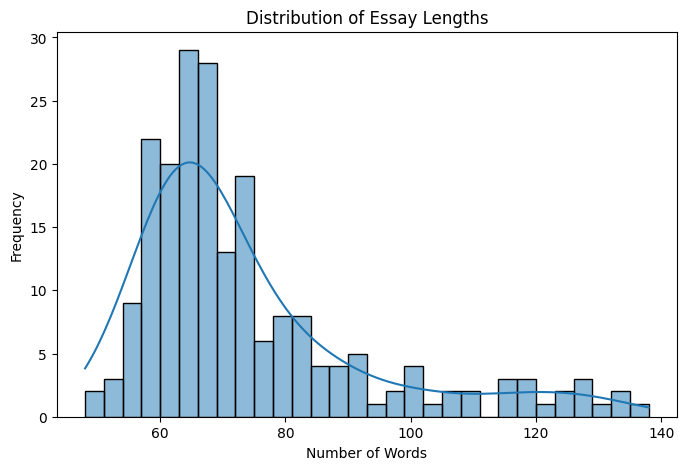

In [ ]:
cw2_data['essay_length'] = cw2_data['essay'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8, 5))
sns.histplot(cw2_data['essay_length'], bins=30, kde=True)
plt.title('Distribution of Essay Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

#Gender-wise Essay Contribution

<ipython-input-399-69b1b2763e18>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=['skyblue', 'lightgreen'])


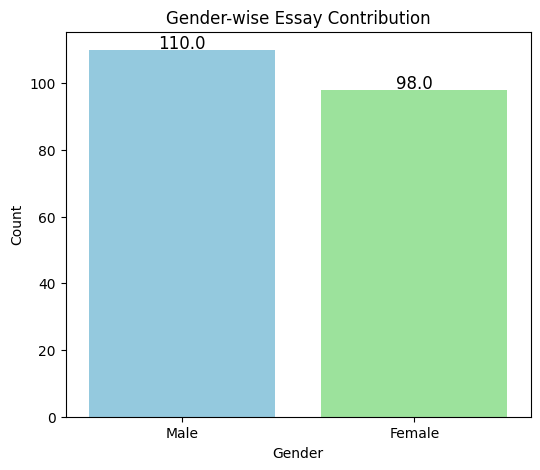

In [ ]:
gender_mapping = {
    1: "Male",
    2: "Female"
}

filtered_data = cw2_data[cw2_data['gender'].isin(gender_mapping.keys())]

filtered_data['gender'] = filtered_data['gender'].map(gender_mapping)

gender_counts = filtered_data['gender'].value_counts()

plt.figure(figsize=(6, 5))
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=['skyblue', 'lightgreen'])

plt.title('Gender-wise Essay Contribution')
plt.xlabel('Gender')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()

#Comparison of Undergraduate and Postgraduate

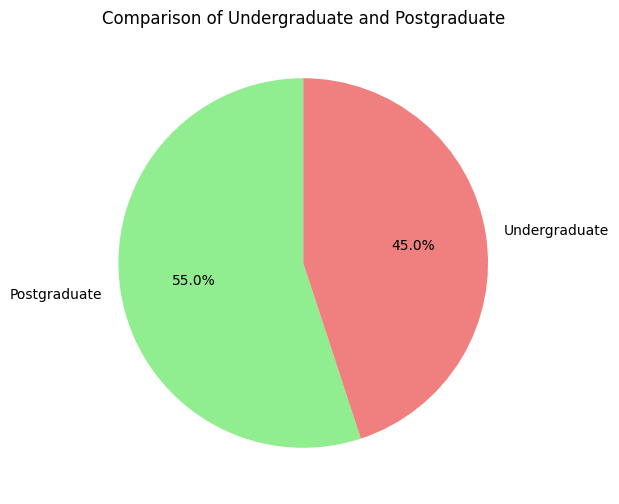

In [ ]:
education_mapping = {
    2: "Undergraduate",
    4: "Postgraduate"
}

filtered_education_data = cw2_data[cw2_data['education'].isin([2, 4])]

education_counts = filtered_education_data['education'].value_counts()

education_counts.index = education_counts.index.map(education_mapping)

plt.figure(figsize=(6, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90)

plt.title('Comparison of Undergraduate and Postgraduate')
plt.show()


#Relationship Between Age and Income Levels

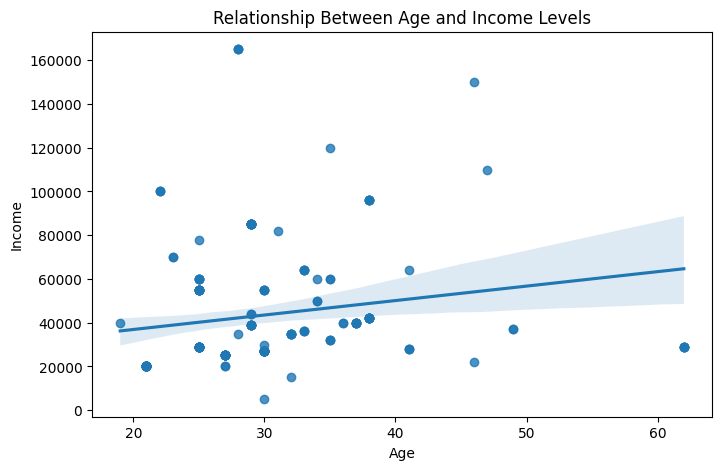

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x='age', y='income', data=cw2_data)
plt.title('Relationship Between Age and Income Levels')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

#Correlation Matrix

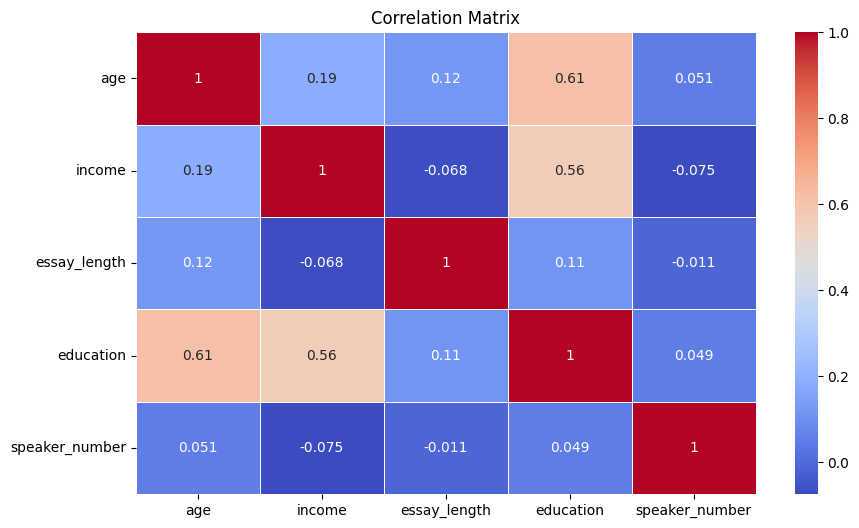

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cw2_data[['age', 'income', 'essay_length', 'education', 'speaker_number']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

#Sentiment Prediction(NLP)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)

    with torch.no_grad():
        outputs = model(**inputs)

    probs = softmax(outputs.logits, dim=1)

    sentiment_scores = ["very negative", "negative", "neutral", "positive", "very positive"]

    sentiment = sentiment_scores[torch.argmax(probs)]

    return sentiment

cw2_data["sentiment"] = cw2_data["essay"].apply(predict_sentiment)

table = cw2_data[['essay_id', 'essay', 'sentiment']].head()

print("Sentiment Prediction(NLP) Result:\n")
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))


Sentiment Prediction(NLP) Result:

+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------+
| essay_id |                                                                                                                                                                                              essay                                                                                                                                                                                               |   sentiment   |
+----------+-------------------------------------------------------------------------------------------------------------------------

#Sentiment Analysis of Essays

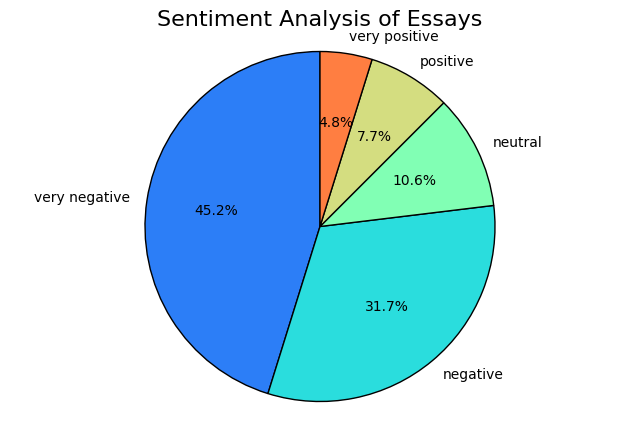

In [ ]:
sentiment_counts = cw2_data["sentiment"].value_counts()

plt.figure(figsize=(8, 5))

plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette("rainbow", len(sentiment_counts)),
        startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title("Sentiment Analysis of Essays", fontsize=16)
plt.axis('equal')

plt.show()


#Most Frequent Positive and Negative Sentiment Word in Essays

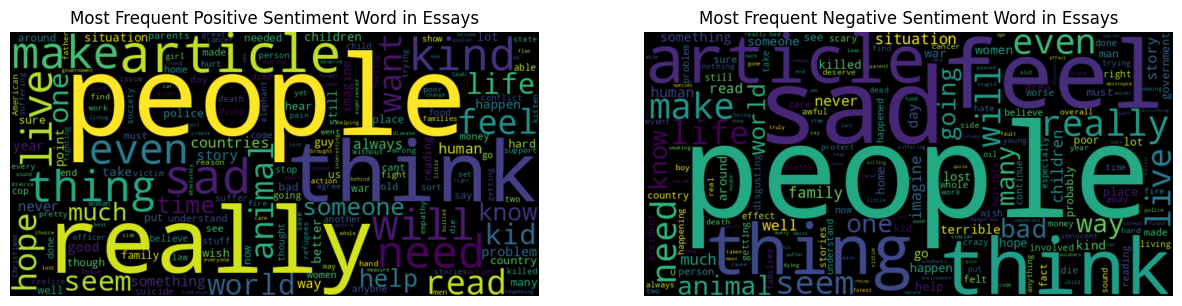

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

cw2_data['sentiment'] = cw2_data['essay'].apply(get_sentiment)

positive_essays = cw2_data[cw2_data['sentiment'] > 0]['essay']

negative_essays = cw2_data[cw2_data['sentiment'] < 0]['essay']

positive_text = ' '.join(positive_essays)

negative_text = ' '.join(negative_essays)

positive_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_text)

negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Positive Sentiment Word in Essays")

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Negative Sentiment Word in Essays")

plt.show()


#Deep Learning Model

#Model of Convolutional Neural Network

In [ ]:
X = cw2_data['race'].astype(str)
y = cw2_data['race'].astype('category').cat.codes

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

X_pad = pad_sequences(X_seq, maxlen=200)

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy_cnn = model.evaluate(X_test, y_test)
print(f"Accuracy of Convolutional Neural Network: {accuracy_cnn:.2%}")

y_pred_cnn = model.predict(X_test)
y_pred_classes = (y_pred_cnn > 0.5).astype(int)

print("\nClassification Report of Convolutional Neural Network:")
print(classification_report(y_test, y_pred_classes))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.7556 - loss: 0.6507 - val_accuracy: 0.7857 - val_loss: 0.9105
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8390 - loss: 0.7145 - val_accuracy: 0.7857 - val_loss: 0.6622
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8283 - loss: 0.6003 - val_accuracy: 0.7857 - val_loss: 0.7477
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8717 - loss: 0.5941 - val_accuracy: 0.7857 - val_loss: 0.6153
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8489 - loss: 0.5712 - val_accuracy: 0.7857 - val_loss: 0.5390
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.8435 - loss: 0.4717 - val_accuracy: 0.7857 - val_loss: 0.4519
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8658 - loss: 0.3449 - val_accuracy: 0.7857 - val_loss: 0.2903
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8854 - loss: 0.2285 - val_accuracy: 0.8333 - val_loss: 0.1412
Epoch 9/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Confusion Matrix of Convolutional Neural Network

In [ ]:
cm = confusion_matrix(y_test, y_pred_classes)

print("\nConfusion Matrix of Convolutional Neural Network:\n")
print(cm)



Confusion Matrix of Convolutional Neural Network:

[[33  0  0  0]
 [ 0  2  0  0]
 [ 0  6  0  0]
 [ 0  1  0  0]]


#Model of Long Short-Term Memory

In [ ]:
label_encoder = LabelEncoder()
cw2_data['gender'] = label_encoder.fit_transform(cw2_data['gender'])
cw2_data['education'] = label_encoder.fit_transform(cw2_data['education'])
cw2_data['race'] = label_encoder.fit_transform(cw2_data['race'])
cw2_data['income'] = label_encoder.fit_transform(cw2_data['income'])

X = cw2_data[['gender', 'race', 'age', 'income', 'speaker_number']]
y = cw2_data['race']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

model = Sequential()

model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=False))

model.add(Dropout(0.2))

model.add(Dense(len(np.unique(y)), activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train_reshaped, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_test_reshaped, y_test),
                    callbacks=[early_stopping])

loss, accuracy_lstm = model.evaluate(X_test_reshaped, y_test)

y_pred_lstm = model.predict(X_test_reshaped)
y_pred_lstm = np.argmax(y_pred_lstm, axis=1)

print(f"Accuracy of Long Short-Term Memory: {accuracy_lstm * 100:.2f}%")

print("\nClassification Report of Long Short-Term Memory:")
print(classification_report(y_test, y_pred_lstm))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 0.1653 - loss: 1.4283 - val_accuracy: 0.2143 - val_loss: 1.2921
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3194 - loss: 1.3130 - val_accuracy: 0.6667 - val_loss: 1.1822
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4985 - loss: 1.2119 - val_accuracy: 0.8095 - val_loss: 1.0835
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6774 - loss: 1.0941 - val_accuracy: 0.7857 - val_loss: 0.9954
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8049 - loss: 0.9937 - val_accuracy: 0.7857 - val_loss: 0.9210
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8207 - loss: 0.9060 - val_accuracy: 0.7857 - val_loss: 0.8593
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8258 - loss: 0.8417 - val_accuracy: 0.7857 - val_loss: 0.8110
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8544 - loss: 0.7917 - val_accuracy: 0.7857 - val_loss: 0.7751
Epoch 9/10

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Confusion Matrix of Long Short-Term Memory

In [ ]:
cm = confusion_matrix(y_test, y_pred_lstm)
print("\nConfusion Matrix of Long Short-Term Memory:\n")
print(cm)



Confusion Matrix of Long Short-Term Memory:

[[33  0  0  0]
 [ 2  0  0  0]
 [ 6  0  0  0]
 [ 1  0  0  0]]


#Comparison of CNN and LSTM Accuracy

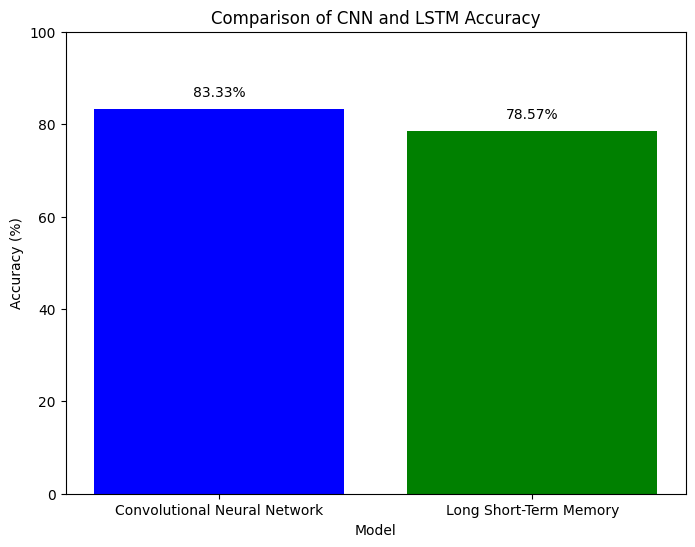

In [ ]:
models = ['Convolutional Neural Network', 'Long Short-Term Memory']
accuracies = [accuracy_cnn * 100, accuracy_lstm * 100]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 2, f'{yval:.2f}%', ha='center', va='bottom')

plt.title('Comparison of CNN and LSTM Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()
